In [1]:
import pandas as pd
import numpy as np

In [335]:
calcu_df = pd.read_csv('./models_predict.csv', index_col='Date')

In [336]:
calcu_df['sum'] = calcu_df.iloc[:, 3:8].sum(axis=1)
print(calcu_df['sum'])

Date
2023-01-03    4
2023-01-04    3
2023-01-05    5
2023-01-06    3
2023-01-09    5
             ..
2024-06-24    5
2024-06-25    4
2024-06-26    5
2024-06-27    5
2024-06-28    4
Name: sum, Length: 374, dtype: int64


In [247]:
calcu_df['sum'].value_counts()

sum
4    155
5    144
3     53
2     21
1      1
Name: count, dtype: int64

# Try1. Voting 기준을 다르게 시도해보기

In [274]:
# 시그널 생성 홤수 (4이상일 때 buy)
def generate_sum_signal(row, prev_sum):
    if row['sum'] >= 4:
        return 'holding' if prev_sum >= 4 else 'buy'
    else:
        return 'clear' if prev_sum >= 4 else 'no_action'

Payoff Ratio: 2.363033319030712  
Profit Factor: 3.347630535293508  
Final Portfolio Value: 19011.957025778207  
Return: 90.12%  
MDD: -7.65%  
Win Rate: 58%  
Number of Trades: 59  

In [43]:
# 시그널 생성 홤수 (3이상일 때 buy)
def generate_sum_signal(row, prev_sum):
    if row['sum'] >= 3:
        return 'holding' if prev_sum >= 3 else 'buy'
    else:
        return 'clear' if prev_sum >= 3 else 'no_action'

Payoff Ratio: 3.9194202408180328
Profit Factor: 2.239668709038876
Final Portfolio Value: 15857.099491735053
Return: 58.57%
MDD: -12.02%
Win Rate: 35%
Number of Trades: 23

In [263]:
# 값 초기화
calcu_df['sum_signal'] = ''
prev_sum = 0

# 시그널 생성 함수 적용
for idx, row in calcu_df.iterrows():
    calcu_df.at[idx, 'sum_signal'] = generate_sum_signal(row, prev_sum)
    prev_sum = int(row['sum'])

calcu_df.head(10)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,clear
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,clear
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,holding
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,holding
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


In [269]:
# 조건에 따라 sum_signal 값을 업데이트하는 함수 정의
def update_sum_signal(df):
    for i in range(len(df)):
        sum_values = df.loc[df.index[i], ['knn_predict', 'nb_predict', 'lr_predict', 'rf_predict', 'xg_predict']].sum()

        if i == 0:
            if sum_values == 5:
                df.loc[df.index[i], 'sum_signal'] = 'buy'
            else:
                df.loc[df.index[i], 'sum_signal'] = 'no_action'
        else:
            previous_signal = df.loc[df.index[i - 1], 'sum_signal']
            if sum_values == 5:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'sum_signal'] = 'buy'

            elif sum_values == 4:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'sum_signal'] = 'no_action'

            else:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'clear'
                else:
                    df.loc[df.index[i], 'sum_signal'] = 'no_action'

# 함수 실행
update_sum_signal(calcu_df)

# 결과 확인
calcu_df.head(10)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,no_action
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,no_action
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,clear
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,holding
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,holding
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


Payoff Ratio: 1.9954937935381976  
Profit Factor: 2.993240690307297  
Final Portfolio Value: 16992.66958525492  
Return: 69.93%  
MDD: -7.65%  
Win Rate: 59%  
Number of Trades: 51  

In [271]:
# 조건에 따라 sum_signal 값을 업데이트하는 함수 정의
def update_sum_signal(df):
    for i in range(len(df)):
        sum_values = df.loc[df.index[i], ['knn_predict', 'nb_predict', 'lr_predict', 'rf_predict', 'xg_predict']].sum()

        if i == 0:
            if sum_values >= 4:
                df.loc[df.index[i], 'sum_signal'] = 'buy'
            else:
                df.loc[df.index[i], 'sum_signal'] = 'no_action'
        else:
            previous_signal = df.loc[df.index[i - 1], 'sum_signal']
            if sum_values == 5:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'sum_signal'] = 'buy'

            elif sum_values == 4:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'clear'

                else:
                    df.loc[df.index[i], 'sum_signal'] = 'buy'

            else:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'sum_signal'] = 'clear'
                else:
                    df.loc[df.index[i], 'sum_signal'] = 'no_action'

# 함수 실행
update_sum_signal(calcu_df)

# 결과 확인
calcu_df.head(30)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,clear
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,clear
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,clear
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,buy
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


Payoff Ratio: 1.1609868715575997  
Profit Factor: 1.8689056956780874  
Final Portfolio Value: 15872.63636822928  
Return: 58.73%  
MDD: -6.50%  
Win Rate: 62%  
Number of Trades: 214

# Back test

In [272]:
bt_df = calcu_df.copy()
bt_df = bt_df[['Open', 'Close', 'sum_signal']]

bt_df.index = pd.to_datetime(bt_df.index)

bt_df.head(20)

,Open,Close,sum_signal
Date,,,
2023-01-03,130.279999,124.048042,buy
2023-01-04,126.889999,125.327507,clear
2023-01-05,127.129997,123.998451,buy
2023-01-06,126.010002,128.560867,clear
2023-01-09,130.470001,129.086533,buy
2023-01-10,130.259995,129.661789,clear
2023-01-11,131.250000,132.399261,buy
2023-01-12,133.880005,132.319901,holding
2023-01-13,132.029999,133.658859,holding


In [273]:
# 초기 자금
initial_capital = 10000.0
cash = initial_capital
shares = 0
num_trades = 0
wins = 0
profit_sum = 0
loss_sum = 0
win_trades = []
loss_trades = []

# 포트폴리오 가치 추적 리스트
portfolio_values = []
cumulative_max = initial_capital  # 누적 최대값 초기화

buy_price = 0

for index, row in bt_df.iterrows():
    signal = row['sum_signal']
    close_price = row['Close']
    
    if signal == 'buy' and cash > 0:
        # 매수: 현재 현금으로 최대한 많은 주식을 구매
        shares += cash / close_price
        cash = 0
        cumulative_max = shares * close_price  # 누적 최대값 초기화
        buy_price = close_price
        num_trades += 1  # 매수 시 거래 횟수 증가
    elif signal == 'clear' and shares > 0:
        # 매도: 현재 보유한 모든 주식을 판매
        cash += shares * close_price
        shares = 0
        cumulative_max = cash  # 누적 최대값 초기화
        num_trades += 1  # 매도 시 거래 횟수 증가
        
        trade_profit = close_price - buy_price
        
        if trade_profit > 0:
            wins += 1
            profit_sum += trade_profit
            win_trades.append(trade_profit)
        else:
            loss_sum += abs(trade_profit)
            loss_trades.append(trade_profit)
    
    # 현재 포트폴리오 가치 계산
    portfolio_value = cash + shares * close_price
    portfolio_values.append(portfolio_value)
    
    # 누적 최대값 갱신
    if portfolio_value > cumulative_max:
        cumulative_max = portfolio_value
    
    bt_df.loc[index, 'Cumulative Max'] = cumulative_max

# 백테스트 결과 DataFrame에 추가
bt_df['Portfolio Value'] = portfolio_values

# 최대 하락폭 (MDD) 계산
bt_df['Drawdown'] = (bt_df['Portfolio Value'] - bt_df['Cumulative Max']) / bt_df['Cumulative Max']
max_drawdown = bt_df['Drawdown'].min() * 100  # 퍼센트로 변환

# 최종 포트폴리오 가치
final_portfolio_value = portfolio_values[-1]

# 수익률 계산
roi = ((final_portfolio_value - initial_capital) / initial_capital) * 100

# 승률 계산
win_rate = (wins / (num_trades / 2)) * 100  # 매수-매도 한 쌍을 한 거래로 간주하여 승률 계산

# Payoff Ratio 계산
average_profit_per_winning_trade = profit_sum / len(win_trades) if win_trades else 0
average_loss_per_losing_trade = loss_sum / len(loss_trades) if loss_trades else 0
payoff_ratio = average_profit_per_winning_trade / average_loss_per_losing_trade if average_loss_per_losing_trade != 0 else float('inf')

# Profit Factor 계산
profit_factor = profit_sum / loss_sum if loss_sum != 0 else float('inf')

print(f"Payoff Ratio: {payoff_ratio}  ")
print(f"Profit Factor: {profit_factor}  ")
print(f"Final Portfolio Value: {final_portfolio_value}  ")
print(f"Return: {roi:.2f}%  ")
print(f"MDD: {max_drawdown:.2f}%  ")
print(f"Win Rate: {win_rate:.0f}%  ")
print(f"Number of Trades: {num_trades}  ")

Payoff Ratio: 1.1609868715575997  
Profit Factor: 1.8689056956780874  
Final Portfolio Value: 15872.63636822928  
Return: 58.73%  
MDD: -6.50%  
Win Rate: 62%  
Number of Trades: 214  


# Try2. 단일 모델 + 횡보라벨

5가지 모델 중 횡보 class를 포함한 multi class classification 정확도가 가장 높은 모델로 전략을 생성

횡보 어떻게 정할지 고민하다가 생각이 안나서 단순하게 수정 종가 변동률 0.5%를 기준으로 만듦

횡보 추가할라 했으나 제일 높은 정확도가 37% 정도로 매우 낮아 진행하지 않음

# Try3. KNN K값에 따른 전략

k값이 작으면 민감하게 반응  
k값이 크면 둔감하게 반응한다고 생각  
따라서 k값의 크기에 따른 모델 3개를 만들고 전략생성  

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [296]:
df = pd.read_csv("./apple_TI.csv", index_col='Date')

In [297]:
# 전처리
df['label'] = df['label'].map({'up': 1, 'down': 0})
df.index = pd.to_datetime(df.index)
idx = pd.Timestamp('2023-01-01')
train_data = df[df.index < idx]
test_data = df[df.index >= idx]

# 수익률 계산을 위한 데이터프레임 준비
calcu_df = df.copy()
calcu_df = calcu_df[['Open','Close', 'label']]
calcu_df = calcu_df[calcu_df.index >= idx]

# 변수 집합
select_knn = ['cmo', 'ht_dcperiod', 'ht_dcphase', 'sine', 'leadsine', 'ht_trendmode', 'ppo', 'roc', 'rsi', 'fastk', 'fastd', 'trix']

# 독립, 종속 변수 분할
train_x = train_data[select_knn]
train_y = train_data['label']
test_x = test_data[select_knn]
test_y = test_data['label']

# 스케일링
scaler = StandardScaler()
train_x_knn = scaler.fit_transform(train_x)
test_x_knn = scaler.transform(test_x)

# 모델 선언
knn = KNeighborsClassifier()

# 모델 학습
knn.fit(train_x_knn, train_y)

KNeighborsClassifier()

Best k value: 51


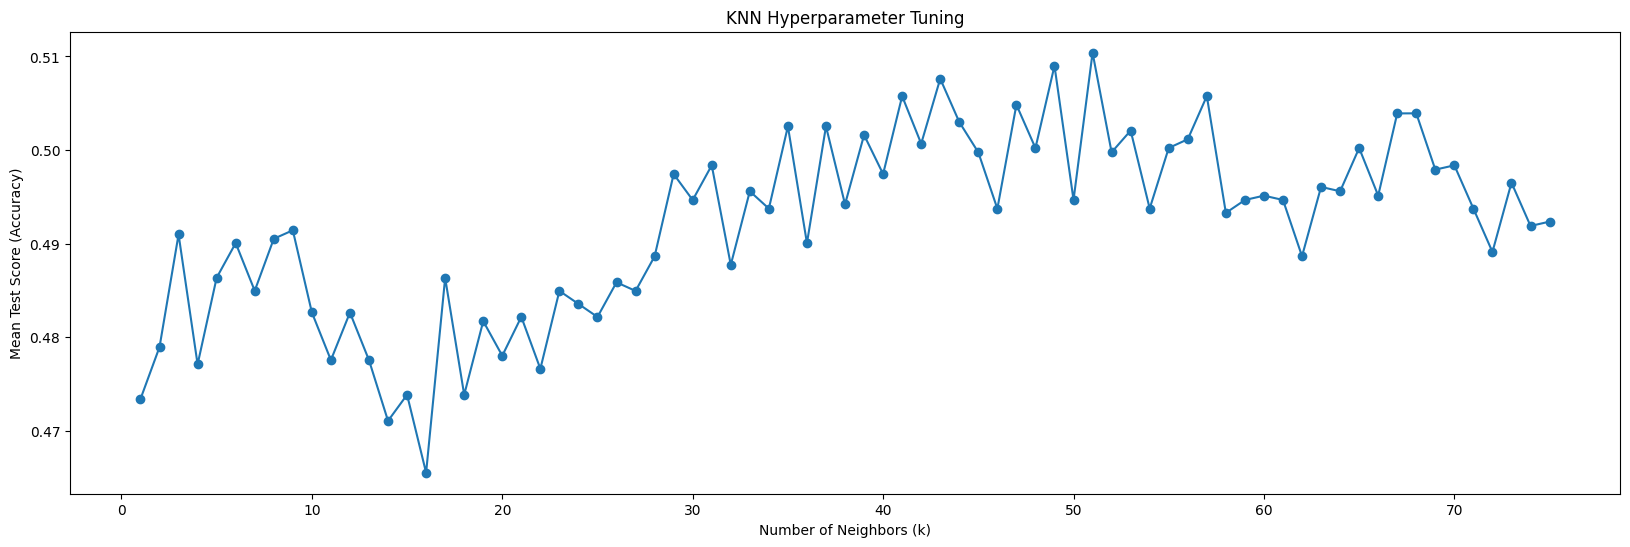

In [298]:
# GridSearchCV를 사용하여 최적의 k 값 찾기 (전체 변수)
param_grid = {'n_neighbors': np.arange(1, 76)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x_knn, train_y)

# 최적의 k 값
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# 결과 시각화
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(20, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

k: 1 ~ 15 -> 9  
k: 16 ~ 30 -> 29  
k: 31 ~ 45 -> 43  
k: 46 ~ 60 -> 51  
k: 61 ~ 75 -> 68  

위 5개의 값을 가지고 진행

In [299]:
# 모델 선언
for k in [9,29,43,51,68]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x_knn, train_y)
    y_pred_knn = knn.predict(test_x_knn)

    calcu_df[f'knn_predict_{k}'] = y_pred_knn
    print(calcu_df[f'knn_predict_{k}'].value_counts())

calcu_df

knn_predict_9
1    211
0    163
Name: count, dtype: int64
knn_predict_29
1    219
0    155
Name: count, dtype: int64
knn_predict_43
1    225
0    149
Name: count, dtype: int64
knn_predict_51
1    224
0    150
Name: count, dtype: int64
knn_predict_68
1    232
0    142
Name: count, dtype: int64


,Open,Close,label,knn_predict_9,knn_predict_29,knn_predict_43,knn_predict_51,knn_predict_68
Date,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,1,0,1,0
2023-01-04,126.889999,125.327507,0,0,0,1,1,1
2023-01-05,127.129997,123.998451,1,0,1,1,1,1
2023-01-06,126.010002,128.560867,1,1,0,0,0,0
2023-01-09,130.470001,129.086533,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,208.139999,1,1,1,1,1,0
2024-06-25,209.149994,209.070007,1,1,1,1,1,1
2024-06-26,211.500000,213.250000,1,1,1,0,0,0


In [300]:
# calcu_df.to_csv('./knn_five_models_predictions.csv')

In [311]:
calcu_df = pd.read_csv('./knn_five_models_predictions.csv', index_col='Date')

In [313]:
calcu_df['sum_k'] = calcu_df.iloc[:, 3:8].sum(axis=1)
print(calcu_df['sum_k'])

Date
2023-01-03    3
2023-01-04    3
2023-01-05    4
2023-01-06    1
2023-01-09    1
             ..
2024-06-24    4
2024-06-25    5
2024-06-26    2
2024-06-27    5
2024-06-28    1
Name: sum_k, Length: 374, dtype: int64


In [314]:
calcu_df['sum_k'].value_counts()

sum_k
5    111
4     64
3     54
0     52
1     48
2     45
Name: count, dtype: int64

In [325]:
# 조건에 따라 signal 값을 업데이트하는 함수 정의
def update_sum_signal(df):
    for i in range(len(df)):
        sum_values = df.loc[df.index[i], ['knn_predict_9', 'knn_predict_29', 'knn_predict_43', 'knn_predict_51', 'knn_predict_68']].sum()

        if i == 0:
            if sum_values >= 3:
                df.loc[df.index[i], 'k5_signal'] = 'buy'
            else:
                df.loc[df.index[i], 'k5_signal'] = 'no_action'
        else:
            previous_signal = df.loc[df.index[i - 1], 'k5_signal']
            if sum_values >= 4:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'k5_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'k5_signal'] = 'buy'

            elif sum_values == 3:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'k5_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'k5_signal'] = 'no_action'

            else:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'k5_signal'] = 'clear'
                else:
                    df.loc[df.index[i], 'k5_signal'] = 'no_action'

# 함수 실행
update_sum_signal(calcu_df)

# 결과 확인
calcu_df.head(10)

,Open,Close,label,knn_predict_9,knn_predict_29,knn_predict_43,knn_predict_51,knn_predict_68,sum_k,k5_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,1,0,1,0,3,buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,holding
2023-01-05,127.129997,123.998451,1,0,1,1,1,1,4,holding
2023-01-06,126.010002,128.560867,1,1,0,0,0,0,1,clear
2023-01-09,130.470001,129.086533,1,1,0,0,0,0,1,no_action
2023-01-10,130.259995,129.661789,1,1,1,0,0,0,2,no_action
2023-01-11,131.250000,132.399261,0,1,1,1,1,1,5,buy
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


Payoff Ratio: 1.4749980177006379  
Profit Factor: 1.7956497606790376  
Final Portfolio Value: 13648.460648384424  
Return: 36.48%  
MDD: -6.85%  
Win Rate: 55%  
Number of Trades: 102 

In [321]:
# 조건에 따라 signal 값을 업데이트하는 함수 정의
def update_sum_signal(df):
    for i in range(len(df)):
        sum_values = df.loc[df.index[i], ['knn_predict_9', 'knn_predict_29', 'knn_predict_43', 'knn_predict_51', 'knn_predict_68']].sum()

        if i == 0:
            if sum_values >= 3:
                df.loc[df.index[i], 'k5_signal'] = 'buy'
            else:
                df.loc[df.index[i], 'k5_signal'] = 'no_action'
        else:
            previous_signal = df.loc[df.index[i - 1], 'k5_signal']
            if sum_values >= 3:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'k5_signal'] = 'holding'
                else:
                    df.loc[df.index[i], 'k5_signal'] = 'buy'

            else:
                if previous_signal in ['buy', 'holding']:
                    df.loc[df.index[i], 'k5_signal'] = 'clear'
                else:
                    df.loc[df.index[i], 'k5_signal'] = 'no_action'

# 함수 실행
update_sum_signal(calcu_df)

# 결과 확인
calcu_df.head(10)

,Open,Close,label,knn_predict_9,knn_predict_29,knn_predict_43,knn_predict_51,knn_predict_68,sum_k,k5_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,1,0,1,0,3,buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,holding
2023-01-05,127.129997,123.998451,1,0,1,1,1,1,4,holding
2023-01-06,126.010002,128.560867,1,1,0,0,0,0,1,clear
2023-01-09,130.470001,129.086533,1,1,0,0,0,0,1,no_action
2023-01-10,130.259995,129.661789,1,1,1,0,0,0,2,no_action
2023-01-11,131.250000,132.399261,0,1,1,1,1,1,5,buy
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


Payoff Ratio: 1.461444799847378  
Profit Factor: 1.7987012921198502  
Final Portfolio Value: 14011.368903017028  
Return: 40.11%  
MDD: -6.85%  
Win Rate: 55%  
Number of Trades: 116  

In [330]:
# 시그널 생성 홤수 (4이상일 때 buy)
def generate_sum_signal(row, prev_sum):
    if row['sum_k'] >= 4:
        return 'holding' if prev_sum >= 4 else 'buy'
    else:
        return 'clear' if prev_sum >= 4 else 'no_action'

Payoff Ratio: 1.2880247542407186  
Profit Factor: 2.1123605969547787  
Final Portfolio Value: 14888.906081695912  
Return: 48.89%  
MDD: -6.85%  
Win Rate: 62%  
Number of Trades: 132  

In [331]:
# 값 초기화
calcu_df['k5_signal'] = ''
prev_sum = 0

# 시그널 생성 함수 적용
for idx, row in calcu_df.iterrows():
    calcu_df.at[idx, 'k5_signal'] = generate_sum_signal(row, prev_sum)
    prev_sum = int(row['sum_k'])

calcu_df.head(30)

,Open,Close,label,knn_predict_9,knn_predict_29,knn_predict_43,knn_predict_51,knn_predict_68,sum_k,k5_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,1,0,1,0,3,no_action
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,no_action
2023-01-05,127.129997,123.998451,1,0,1,1,1,1,4,buy
2023-01-06,126.010002,128.560867,1,1,0,0,0,0,1,clear
2023-01-09,130.470001,129.086533,1,1,0,0,0,0,1,no_action
2023-01-10,130.259995,129.661789,1,1,1,0,0,0,2,no_action
2023-01-11,131.250000,132.399261,0,1,1,1,1,1,5,buy
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


# Back test

In [332]:
bt_df = calcu_df.copy()
bt_df = bt_df[['Open', 'Close', 'k5_signal']]

bt_df.index = pd.to_datetime(bt_df.index)

bt_df

,Open,Close,k5_signal
Date,,,
2023-01-03,130.279999,124.048042,no_action
2023-01-04,126.889999,125.327507,no_action
2023-01-05,127.129997,123.998451,buy
2023-01-06,126.010002,128.560867,clear
2023-01-09,130.470001,129.086533,no_action
...,...,...,...
2024-06-24,207.720001,208.139999,holding
2024-06-25,209.149994,209.070007,holding
2024-06-26,211.500000,213.250000,clear


In [333]:
# 초기 자금
initial_capital = 10000.0
cash = initial_capital
shares = 0
num_trades = 0
wins = 0
profit_sum = 0
loss_sum = 0
win_trades = []
loss_trades = []

# 포트폴리오 가치 추적 리스트
portfolio_values = []
cumulative_max = initial_capital  # 누적 최대값 초기화

buy_price = 0

for index, row in bt_df.iterrows():
    signal = row['k5_signal']
    close_price = row['Close']
    
    if signal == 'buy' and cash > 0:
        # 매수: 현재 현금으로 최대한 많은 주식을 구매
        shares += cash / close_price
        cash = 0
        cumulative_max = shares * close_price  # 누적 최대값 초기화
        buy_price = close_price
        num_trades += 1  # 매수 시 거래 횟수 증가
    elif signal == 'clear' and shares > 0:
        # 매도: 현재 보유한 모든 주식을 판매
        cash += shares * close_price
        shares = 0
        cumulative_max = cash  # 누적 최대값 초기화
        num_trades += 1  # 매도 시 거래 횟수 증가
        
        trade_profit = close_price - buy_price
        
        if trade_profit > 0:
            wins += 1
            profit_sum += trade_profit
            win_trades.append(trade_profit)
        else:
            loss_sum += abs(trade_profit)
            loss_trades.append(trade_profit)
    
    # 현재 포트폴리오 가치 계산
    portfolio_value = cash + shares * close_price
    portfolio_values.append(portfolio_value)
    
    # 누적 최대값 갱신
    if portfolio_value > cumulative_max:
        cumulative_max = portfolio_value
    
    bt_df.loc[index, 'Cumulative Max'] = cumulative_max

# 백테스트 결과 DataFrame에 추가
bt_df['Portfolio Value'] = portfolio_values

# 최대 하락폭 (MDD) 계산
bt_df['Drawdown'] = (bt_df['Portfolio Value'] - bt_df['Cumulative Max']) / bt_df['Cumulative Max']
max_drawdown = bt_df['Drawdown'].min() * 100  # 퍼센트로 변환

# 최종 포트폴리오 가치
final_portfolio_value = portfolio_values[-1]

# 수익률 계산
roi = ((final_portfolio_value - initial_capital) / initial_capital) * 100

# 승률 계산
win_rate = (wins / (num_trades / 2)) * 100  # 매수-매도 한 쌍을 한 거래로 간주하여 승률 계산

# Payoff Ratio 계산
average_profit_per_winning_trade = profit_sum / len(win_trades) if win_trades else 0
average_loss_per_losing_trade = loss_sum / len(loss_trades) if loss_trades else 0
payoff_ratio = average_profit_per_winning_trade / average_loss_per_losing_trade if average_loss_per_losing_trade != 0 else float('inf')

# Profit Factor 계산
profit_factor = profit_sum / loss_sum if loss_sum != 0 else float('inf')

print(f"Payoff Ratio: {payoff_ratio}  ")
print(f"Profit Factor: {profit_factor}  ")
print(f"Final Portfolio Value: {final_portfolio_value}  ")
print(f"Return: {roi:.2f}%  ")
print(f"MDD: {max_drawdown:.2f}%  ")
print(f"Win Rate: {win_rate:.0f}%  ")
print(f"Number of Trades: {num_trades}  ")

Payoff Ratio: 1.2880247542407186  
Profit Factor: 2.1123605969547787  
Final Portfolio Value: 14888.906081695912  
Return: 48.89%  
MDD: -6.85%  
Win Rate: 62%  
Number of Trades: 132  


# Try4. 5가지 알고리즘 voting 전략 + 투자 금액 조정

5가지 모델 중 3개의 모델이 UP을 예측했을 경우에는 50% 구매  
4개 이상의 모델이 UP을 예측했을 경우에는 전부 매수  
50% 씩 매수, 매도를 하기도 하다보니 성과 지표에 대한 기준이 확실치 않아 우선 최종 금액과 MDD, 수익률만 확인

In [337]:
calcu_df = pd.read_csv('./models_predict.csv', index_col='Date')

calcu_df['sum'] = calcu_df.iloc[:, 3:8].sum(axis=1)
calcu_df

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum
Date,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,208.139999,1,1,1,1,1,1,5
2024-06-25,209.149994,209.070007,1,1,1,1,1,0,4
2024-06-26,211.500000,213.250000,1,1,1,1,1,1,5


In [347]:
# 시그널 생성 함수
def generate_sum_signal(row, prev_sum):
    if row['sum'] == 4:
        if prev_sum >= 5:
            return 'half_clear'
        elif prev_sum == 4:
            return 'holding'
        else:
            return 'half_buy'
        
    elif row['sum'] >= 5:
        if prev_sum >= 5:
            return 'holding'
        else:
            return 'buy_all'
        
    else:
        if prev_sum >= 4:
            return 'clear_all'
        else:
            return 'no_action'
        
# 값 초기화
calcu_df['sum_signal'] = ''
prev_sum = 0

# 시그널 생성 함수 적용
for idx, row in calcu_df.iterrows():
    calcu_df.at[idx, 'sum_signal'] = generate_sum_signal(row, prev_sum)
    prev_sum = int(row['sum'])

calcu_df.head(10)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,half_buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,clear_all
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy_all
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,clear_all
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy_all
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,half_clear
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,holding
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,buy_all
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


In [350]:
# 시그널 생성 함수
def generate_sum_signal(row, prev_sum):
    if row['sum'] == 3:
        if prev_sum >= 4:
            return 'half_clear'
        elif prev_sum == 3:
            return 'holding'
        else:
            return 'half_buy'
        
    elif row['sum'] >= 4:
        if prev_sum >= 4:
            return 'holding'
        else:
            return 'buy_all'
        
    else:
        if prev_sum >= 3:
            return 'clear_all'
        else:
            return 'no_action'
        
# 값 초기화
calcu_df['sum'] = calcu_df['sum']
calcu_df['sum_signal'] = ''
prev_sum = 0

# 시그널 생성 함수 적용
for idx, row in calcu_df.iterrows():
    calcu_df.at[idx, 'sum_signal'] = generate_sum_signal(row, prev_sum)
    prev_sum = int(row['sum'])

calcu_df.head(10)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,buy_all
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,half_clear
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy_all
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,half_clear
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy_all
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,holding
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,holding
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,holding
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


In [356]:
# 시그널 생성 함수
def generate_sum_signal(row, prev_sum):
    if row['sum'] == 3:
        if prev_sum >= 4:
            return 'quarter_clear'
        elif prev_sum == 3:
            return 'holding'
        else:
            return 'quarter_buy'
        
    elif row['sum'] == 4:
        if prev_sum >= 5:
            return 'half_clear'
        
        elif prev_sum == 4:
            return 'holding'

        else:
            return 'half_buy'
        
    elif row['sum'] == 5:
        if prev_sum >= 5:
            return 'holding'
        
        else: return 'buy'
        
    else:
        if prev_sum >= 3:
            return 'clear_all'
        else:
            return 'no_action'
        
# 값 초기화
calcu_df['sum_signal'] = ''
prev_sum = 0

# 시그널 생성 함수 적용
for idx, row in calcu_df.iterrows():
    calcu_df.at[idx, 'sum_signal'] = generate_sum_signal(row, prev_sum)
    prev_sum = int(row['sum'])

calcu_df.head(30)

,Open,Close,label,knn_predict,nb_predict,lr_predict,rf_predict,xg_predict,sum,sum_signal
Date,,,,,,,,,,
2023-01-03,130.279999,124.048042,1,1,0,1,1,1,4,half_buy
2023-01-04,126.889999,125.327507,0,0,0,1,1,1,3,quarter_clear
2023-01-05,127.129997,123.998451,1,1,1,1,1,1,5,buy
2023-01-06,126.010002,128.560867,1,0,0,1,1,1,3,quarter_clear
2023-01-09,130.470001,129.086533,1,1,1,1,1,1,5,buy
2023-01-10,130.259995,129.661789,1,0,1,1,1,1,4,half_clear
2023-01-11,131.250000,132.399261,0,0,1,1,1,1,4,holding
2023-01-12,133.880005,132.319901,1,1,1,1,1,1,5,buy
2023-01-13,132.029999,133.658859,1,1,1,1,1,1,5,holding


# back test

In [357]:
bt_df = calcu_df.copy()
bt_df = bt_df[['Open', 'Close', 'sum_signal']]

bt_df.index = pd.to_datetime(bt_df.index)

bt_df.head(20)

,Open,Close,sum_signal
Date,,,
2023-01-03,130.279999,124.048042,half_buy
2023-01-04,126.889999,125.327507,quarter_clear
2023-01-05,127.129997,123.998451,buy
2023-01-06,126.010002,128.560867,quarter_clear
2023-01-09,130.470001,129.086533,buy
2023-01-10,130.259995,129.661789,half_clear
2023-01-11,131.250000,132.399261,holding
2023-01-12,133.880005,132.319901,buy
2023-01-13,132.029999,133.658859,holding


In [359]:
# 초기 자금
initial_capital = 10000.0
cash = initial_capital
shares = 0
num_trades = 0
wins = 0
profit_sum = 0
loss_sum = 0
win_trades = []
loss_trades = []
quarter_buy_amount = 0  # quarter_buy로 매수한 금액을 저장

# 포트폴리오 가치 추적 리스트
portfolio_values = []
cumulative_max = initial_capital  # 누적 최대값 초기화

buy_price = 0

for index, row in bt_df.iterrows():
    signal = row['sum_signal']
    close_price = row['Close']
    
    if signal == 'quarter_buy' and cash > 0:
        # 매수: 현재 현금의 25%로 주식을 구매
        quarter_buy_amount = cash / 4
        shares += quarter_buy_amount / close_price
        cash -= quarter_buy_amount
        num_trades += 1
    elif signal == 'half_buy' and cash > 0:
        # 매수: 현재 현금의 50%로 주식을 구매하도록 추가 구매
        half_buy_target = (initial_capital / 2) - quarter_buy_amount
        if half_buy_target > 0:
            buy_amount = min(half_buy_target, cash)
            shares += buy_amount / close_price
            cash -= buy_amount
            num_trades += 1
    elif signal == 'buy_all' and cash > 0:
        # 매수: 현재 현금으로 최대한 많은 주식을 구매
        shares += cash / close_price
        cash = 0
        buy_price = close_price
        num_trades += 1  # 매수 시 거래 횟수 증가
    elif signal == 'quarter_clear' and shares > 0:
        # 매도: 현재 보유 주식의 25%를 제외하고 판매
        sell_amount = shares * 0.75
        cash += sell_amount * close_price
        shares -= sell_amount
        num_trades += 1
    elif signal == 'half_clear' and shares > 0:
        # 매도: 현재 보유 주식의 50%를 제외하고 판매
        sell_amount = shares * 0.5
        cash += sell_amount * close_price
        shares -= sell_amount
        num_trades += 1
    elif signal == 'clear_all' and shares > 0:
        # 매도: 현재 보유한 모든 주식을 판매
        cash += shares * close_price
        shares = 0
        cumulative_max = cash  # 누적 최대값 초기화
        num_trades += 1  # 매도 시 거래 횟수 증가

        trade_profit = close_price - buy_price
        
        if trade_profit > 0:
            wins += 1
            profit_sum += trade_profit
            win_trades.append(trade_profit)
        else:
            loss_sum += abs(trade_profit)
            loss_trades.append(trade_profit)
    
    # 현재 포트폴리오 가치 계산
    portfolio_value = cash + shares * close_price
    portfolio_values.append(portfolio_value)
    
    # 누적 최대값 갱신
    if portfolio_value > cumulative_max:
        cumulative_max = portfolio_value
    
    bt_df.loc[index, 'Cumulative Max'] = cumulative_max

# 백테스트 결과 DataFrame에 추가
bt_df['Portfolio Value'] = portfolio_values

# 최대 하락폭 (MDD) 계산
bt_df['Drawdown'] = (bt_df['Portfolio Value'] - bt_df['Cumulative Max']) / bt_df['Cumulative Max']
max_drawdown = bt_df['Drawdown'].min() * 100  # 퍼센트로 변환

# 최종 포트폴리오 가치
final_portfolio_value = portfolio_values[-1]

# 수익률 계산
roi = ((final_portfolio_value - initial_capital) / initial_capital) * 100

# 승률 계산
win_rate = (wins / (num_trades / 2)) * 100  # 매수-매도 한 쌍을 한 거래로 간주하여 승률 계산

# Payoff Ratio 계산
average_profit_per_winning_trade = profit_sum / len(win_trades) if win_trades else 0
average_loss_per_losing_trade = loss_sum / len(loss_trades) if loss_trades else 0
payoff_ratio = average_profit_per_winning_trade / average_loss_per_losing_trade if average_loss_per_losing_trade != 0 else float('inf')

# Profit Factor 계산
profit_factor = profit_sum / loss_sum if loss_sum != 0 else float('inf')

print(f"Payoff Ratio: {payoff_ratio}  ")
print(f"Profit Factor: {profit_factor}  ")
print(f"Final Portfolio Value: {final_portfolio_value}  ")
print(f"Return: {roi:.2f}%  ")
print(f"MDD: {max_drawdown:.2f}%  ")
print(f"Win Rate: {win_rate:.0f}%  ")
print(f"Number of Trades: {num_trades}  ")

Payoff Ratio: inf  
Profit Factor: inf  
Final Portfolio Value: 11170.756177799554  
Return: 11.71%  
MDD: -3.05%  
Win Rate: 20%  
Number of Trades: 100  
